## Importing Libraries

In [5]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Make sure this is included
from sklearn.metrics import silhouette_score


## Importing Data

In [6]:
path = r'C:\Users\smerg\esport_earning_2018-2023'

merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsData.cvs'))
merged_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsDataCleaned.cvs'))

In [7]:
# Load your data (replace with your actual data source)
data = merged_cleaned  # Assuming this is the dataset you are working with

# Drop any non-numerical columns (e.g., 'Game', 'Genre', 'Country')
data_numerical = data.select_dtypes(include=['float64', 'int64'])

# Check for missing values and handle them if needed
data_numerical.dropna(inplace=True)

# Inspect the cleaned numerical data
print(data_numerical.head())


   Unnamed: 0.1  Unnamed: 0  TotalEarnings  OfflineEarnings  PercentOffline  \
1          1988        1988       54799.77         54799.77        1.000000   
2          1989        1989       54799.77         54799.77        1.000000   
4          3045        3045    34616725.38      18840032.08        0.544247   
5          3046        3046    34616725.38      18840032.08        0.544247   
6          3047        3047    34616725.38      18840032.08        0.544247   

   TotalPlayers  TotalTournaments  Earnings  Players  Tournaments  \
1            66                 4    629.77      0.0          1.0   
2            66                 4   4170.00     15.0          1.0   
4          4047               835   2560.00     24.0          5.0   
5          4047               835   3247.45     61.0         11.0   
6          4047               835   9140.12     62.0         13.0   

   EarningsGrowth  
1             0.0  
2             0.0  
4             0.0  
5             0.0  
6         

In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Convert back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numerical.columns)

# Check the standardized data
print(data_scaled_df.head())


   Unnamed: 0.1  Unnamed: 0  TotalEarnings  OfflineEarnings  PercentOffline  \
0     -1.594579   -1.594579      -1.235301        -1.028397        1.419758   
1     -1.594126   -1.594126      -1.235301        -1.028397        1.419758   
2     -1.115944   -1.115944      -0.948298        -0.861167       -0.798237   
3     -1.115491   -1.115491      -0.948298        -0.861167       -0.798237   
4     -1.115038   -1.115038      -0.948298        -0.861167       -0.798237   

   TotalPlayers  TotalTournaments  Earnings   Players  Tournaments  \
0     -2.399638         -2.441327 -0.336108 -1.159555    -1.222526   
1     -2.399638         -2.441327 -0.335136 -1.083799    -1.222526   
2     -0.775250         -1.336315 -0.335578 -1.038345    -0.880330   
3     -0.775250         -1.336315 -0.335389 -0.851479    -0.367037   
4     -0.775250         -1.336315 -0.333771 -0.846428    -0.195940   

   EarningsGrowth  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4   

C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

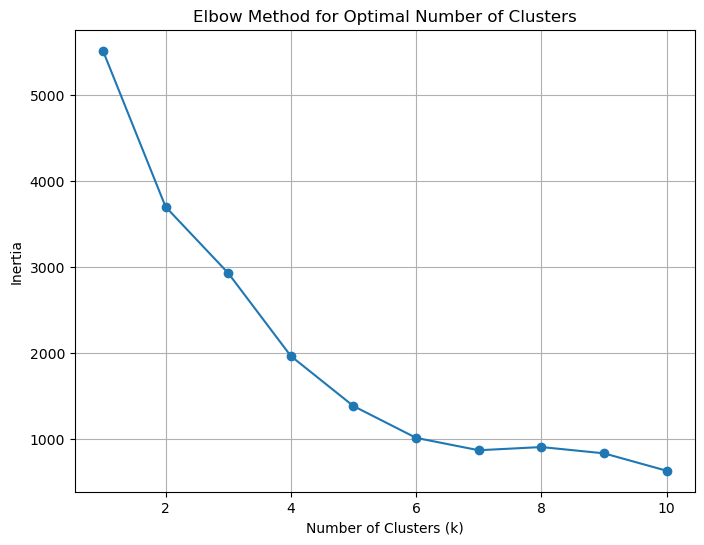

In [9]:
# Calculate inertia for a range of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Explanation: Based on the elbow plot, I chose k = X because it represents the point where adding more clusters provides little improvement in reducing the inertia. This suggests that the data is optimally grouped into X clusters.

In [11]:
# Set the chosen number of clusters based on the elbow plot
X = 3  # Replace this value with the optimal number of clusters you determined

# Run K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=X, random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Add the cluster labels back to the original data
data['Cluster'] = data_scaled_df['Cluster']

# View the data with clusters
print(data.head())


   Unnamed: 0.1  Unnamed: 0          Game ReleaseDate                 Genre  \
0          1987        1987  Call of Duty  2003-01-01  First-Person Shooter   
1          1988        1988  Call of Duty  2003-01-01  First-Person Shooter   
2          1989        1989  Call of Duty  2003-01-01  First-Person Shooter   
3          3044        3044     Overwatch  2016-01-01  First-Person Shooter   
4          3045        3045     Overwatch  2016-01-01  First-Person Shooter   

   TotalEarnings  OfflineEarnings  PercentOffline  TotalPlayers  \
0       54799.77         54799.77        1.000000            66   
1       54799.77         54799.77        1.000000            66   
2       54799.77         54799.77        1.000000            66   
3    34616725.38      18840032.08        0.544247          4047   
4    34616725.38      18840032.08        0.544247          4047   

   TotalTournaments Country        Date  Earnings  Players  Tournaments  \
0                 4     USA  2004-08-01  50000.

C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
# Run K-Means with the chosen number of clusters (replace X with the chosen value)
kmeans = KMeans(n_clusters=X, random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Add the cluster labels back to the original data
data['Cluster'] = data_scaled_df['Cluster']

# View the data with clusters
print(data.head())


   Unnamed: 0.1  Unnamed: 0          Game ReleaseDate                 Genre  \
0          1987        1987  Call of Duty  2003-01-01  First-Person Shooter   
1          1988        1988  Call of Duty  2003-01-01  First-Person Shooter   
2          1989        1989  Call of Duty  2003-01-01  First-Person Shooter   
3          3044        3044     Overwatch  2016-01-01  First-Person Shooter   
4          3045        3045     Overwatch  2016-01-01  First-Person Shooter   

   TotalEarnings  OfflineEarnings  PercentOffline  TotalPlayers  \
0       54799.77         54799.77        1.000000            66   
1       54799.77         54799.77        1.000000            66   
2       54799.77         54799.77        1.000000            66   
3    34616725.38      18840032.08        0.544247          4047   
4    34616725.38      18840032.08        0.544247          4047   

   TotalTournaments Country        Date  Earnings  Players  Tournaments  \
0                 4     USA  2004-08-01  50000.

C:\Users\smerg\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


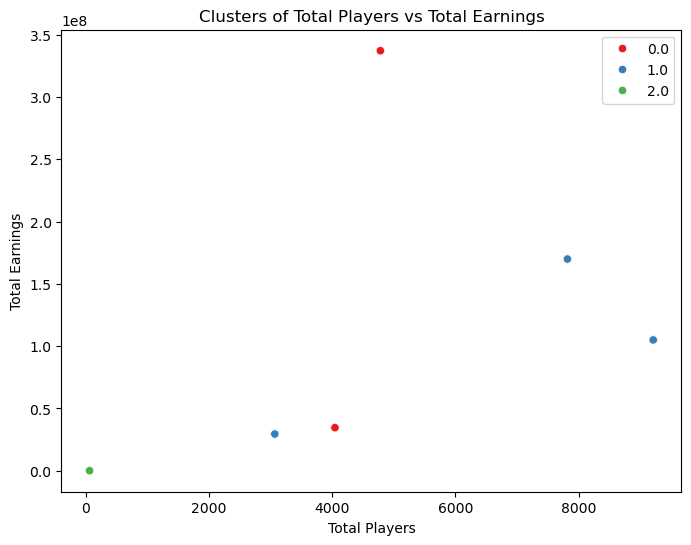

In [13]:
# Example scatterplot for two variables (e.g., Total Players vs Total Earnings)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPlayers', y='TotalEarnings', hue='Cluster', palette='Set1', data=data)
plt.title('Clusters of Total Players vs Total Earnings')
plt.xlabel('Total Players')
plt.ylabel('Total Earnings')
plt.legend()
plt.show()

# You can create more scatter plots by choosing different variables for the axes.


Cluster Analysis: The clusters represent distinct groupings of esports data. For example, we see that clusters are grouped based on the number of players and earnings, suggesting that different games have varying levels of profitability and engagement. Some clusters might represent games with a large player base and high earnings, while others might show a smaller player base with moderate earnings.


In [15]:
# Exclude non-numeric columns (e.g., 'Game', 'Country', 'Genre') before calculating the mean
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Add the 'Cluster' column to the numeric columns for grouping
numeric_columns['Cluster'] = data['Cluster']

# Calculate the mean for each cluster using only numeric columns
cluster_stats = numeric_columns.groupby('Cluster').mean()
print(cluster_stats)


         Unnamed: 0.1   Unnamed: 0  TotalEarnings  OfflineEarnings  \
Cluster                                                              
0.0       4286.076923  4286.076923   2.170956e+08     1.909491e+08   
1.0       8588.327586  8588.327586   8.129581e+07     3.079387e+07   
2.0       3038.961538  3038.961538   3.328742e+07     1.811752e+07   

         PercentOffline  TotalPlayers  TotalTournaments      Earnings  \
Cluster                                                                 
0.0            0.872390   7029.585284       2370.083612  1.470742e+06   
1.0            0.506159   4903.965517       1382.425287  1.110773e+06   
2.0            0.561775   3893.884615        803.038462  4.443108e+05   

            Players  Tournaments  EarningsGrowth  
Cluster                                           
0.0      236.602007    15.719064             0.0  
1.0      220.183908    15.879310             0.0  
2.0      195.692308    10.717949             0.0  


In [17]:
# Calculate descriptive statistics for each cluster
cluster_descriptions = numeric_columns.groupby('Cluster').describe()
print(cluster_descriptions)


        Unnamed: 0.1                                                    \
               count         mean         std     min      25%     50%   
Cluster                                                                  
0.0            299.0  4286.076923  188.011131  3119.0  4134.50  4373.0   
1.0            174.0  8588.327586  645.597149  4523.0  8548.25  8591.5   
2.0             78.0  3038.961538  212.629025  1987.0  3060.25  3079.5   

                         Unnamed: 0               ... Tournaments        \
             75%     max      count         mean  ...         75%   max   
Cluster                                           ...                     
0.0      4447.50  4522.0      299.0  4286.076923  ...       21.00  49.0   
1.0      8882.75  8926.0      174.0  8588.327586  ...       21.00  97.0   
2.0      3098.75  3118.0       78.0  3038.961538  ...       13.75  41.0   

        EarningsGrowth                                     
                 count mean  std  min  25%  

Proposed Future Uses:

These clusters could help identify different types of esports games, enabling targeted marketing strategies for games based on their profitability and player base.
Clusters can also help inform investment decisions, prioritizing high-earning games or supporting smaller games with potential for growth.
In future steps, additional clustering with game genres or regions could provide more nuanced insights, and classification models could predict a game’s cluster based on its attributes.